In [1]:
%cd ..

c:\Users\nakag\c3\pbl-ssc_with_gfootball


In [2]:
import matplotlib.pyplot as plt
import re

In [3]:
def extract_gfootball_scenario_data(filepath):
    """
    GFootballのシナリオファイルを読み込み、ボール位置および両チームの
    プレイヤー情報（座標と役割）を抽出する。
    Right TeamのX座標は、自陣を0とした相対座標であると仮定し、全体座標系に反転させる。

    Args:
        filepath (str): GFootballシナリオを記述したテキストファイルのパス。

    Returns:
        tuple: (ball_position, left_team_players, right_team_players)
                ball_position (tuple or None): ボールの(x, y)座標、またはNone。
                left_team_players (list): 左チームのプレイヤーリスト。各要素は(x, y, role_str)のタプル。
                right_team_players (list): 右チームのプレイヤーリスト。各要素は(x, y, role_str)のタプル。
    """
    with open(filepath, "r") as f:
        content = f.read()

    ball_position = None
    left_team_players = []
    right_team_players = []

    ball_match = re.search(
        r"builder\.SetBallPosition\(([-+]?\d+\.\d+),\s*([-+]?\d+\.\d+)\)", content
    )
    if ball_match:
        ball_position = (float(ball_match.group(1)), float(ball_match.group(2)))

    first_team_block_match = re.search(
        r"builder\.SetTeam\(first_team\)\s*(.*?)(?=builder\.SetTeam\(second_team\))",
        content,
        re.DOTALL,
    )
    if first_team_block_match:
        first_team_block = first_team_block_match.group(1)
        player_matches = re.findall(
            r"builder\.AddPlayer\(([-+]?\d+\.\d+),\s*([-+]?\d+\.\d+),\s*e_PlayerRole_([A-Za-z_]+)\)",
            first_team_block,
        )
        left_team_players = [
            (float(x), float(y), role) for x, y, role in player_matches
        ]

    second_team_block_match = re.search(
        r"builder\.SetTeam\(second_team\)\s*(.*)", content, re.DOTALL
    )
    if second_team_block_match:
        second_team_block = second_team_block_match.group(1)
        player_matches = re.findall(
            r"builder\.AddPlayer\(([-+]?\d+\.\d+),\s*([-+]?\d+\.\d+),\s*e_PlayerRole_([A-Za-z_]+)\)",
            second_team_block,
        )
        right_team_players = [
            (-float(x), float(y), role) for x, y, role in player_matches
        ]

    return ball_position, left_team_players, right_team_players


def plot_gfootball_scenario(
    ball_position,
    left_team_players,
    right_team_players,
    output_filename="gfootball_player_roles_reflected_plot.png",
):
    """
    抽出されたGFootballのシナリオデータに基づき、プレイヤーの役割とボールの位置をプロットする。

    Args:
        ball_position (tuple or None): ボールの(x, y)座標、またはNone。
        left_team_players (list): 左チームのプレイヤーリスト。各要素は(x, y, role_str)のタプル。
        right_team_players (list): 右チームのプレイヤーリスト。各要素は(x, y, role_str)のタプル。
        output_filename (str): 出力するプロット画像のファイル名。
    """
    plt.figure(figsize=(12, 8))

    for x, y, role in left_team_players:
        plt.text(
            x,
            y,
            role,
            color="blue",
            ha="center",
            va="center",
            fontsize=9,
            bbox=dict(
                facecolor="lightblue",
                alpha=0.5,
                edgecolor="blue",
                boxstyle="round,pad=0.3",
            ),
        )

    for x, y, role in right_team_players:
        plt.text(
            x,
            y,
            role,
            color="red",
            ha="center",
            va="center",
            fontsize=9,
            bbox=dict(
                facecolor="salmon", alpha=0.5, edgecolor="red", boxstyle="round,pad=0.3"
            ),
        )

    if ball_position:
        plt.scatter(
            ball_position[0],
            ball_position[1],
            color="black",
            label="Ball",
            marker="*",
            s=300,
            zorder=5,
        )

    plt.title(
        "GFootball Player Roles and Ball Positions (Reflected for Right Team)",
        fontsize=14,
    )
    plt.xlabel("X-coordinate", fontsize=12)
    plt.ylabel("Y-coordinate", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.axvline(x=0, color="gray", linestyle="--", linewidth=0.8)
    plt.axhline(y=0, color="gray", linestyle="--", linewidth=0.8)

    plt.scatter([], [], color="blue", marker="o", label="Left Team Player")
    plt.scatter([], [], color="red", marker="x", label="Right Team Player")
    plt.legend(loc="upper right")

    plt.xlim([-1.0, 1.0])
    plt.ylim([-0.5, 0.5])
    plt.gca().set_aspect("equal", adjustable="box")
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()


def plot_gfootball_scenario_with_roles(filepath):
    """
    GFootballのシナリオファイルを読み込み、プレイヤーの役割をテキストとして、
    ボールの位置を点として散布図にプロットする。
    片方のチームのX座標は、自陣を0とした相対座標であると仮定し、全体座標系に反転させる。

    Args:
        filepath (str): GFootballシナリオを記述したテキストファイルのパス。
    """
    (
        ball_position,
        left_team_players,
        right_team_players,
    ) = extract_gfootball_scenario_data(filepath)
    plot_gfootball_scenario(ball_position, left_team_players, right_team_players)

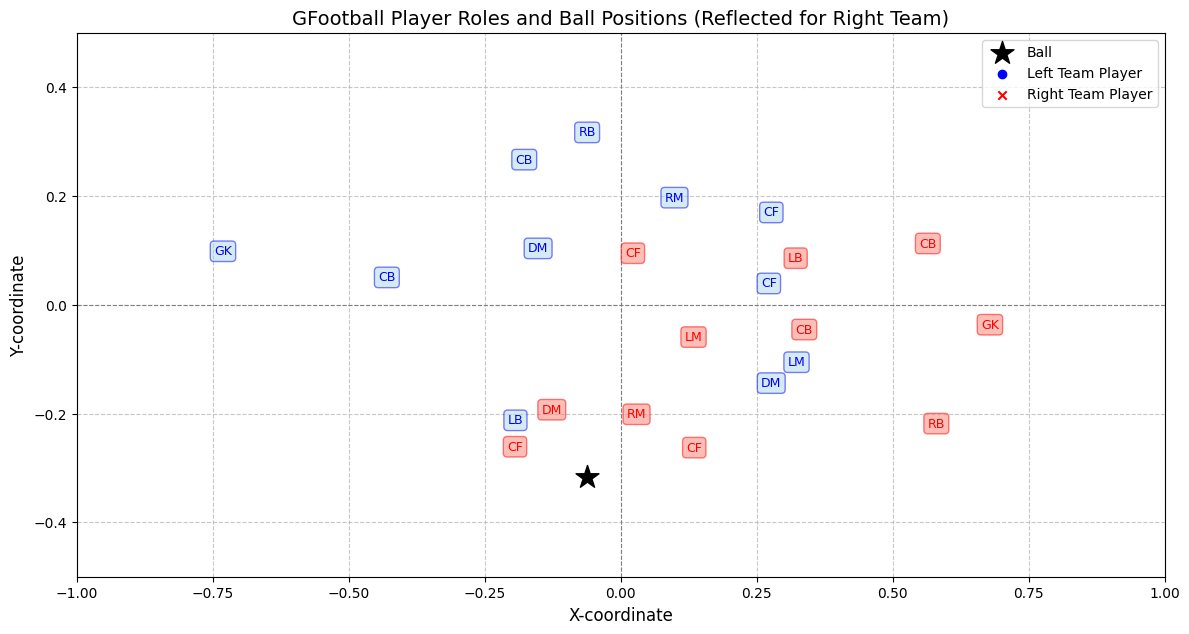

In [ ]:
scenario_filename = "scenarios/from_real_soccer_data.py"
scenario_filename = "scenarios/customed_scenario.py"

# ファイルからプロットを実行
plot_gfootball_scenario_with_roles(scenario_filename)